In [1]:
%matplotlib inline
# This command is to plot images in the notebook

In [2]:
from __future__ import print_function
from fenics import *
import time
import matplotlib.pyplot as plt

In [36]:
T = 0.1       # final time
num_steps = 40     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
#nx = ny = 30
#mesh = RectangleMesh(Point(-2, -2), Point(2, 2), nx, ny)
mesh = UnitSquareMesh(16, 16)
Vh = FunctionSpace(mesh, "DG", 1)

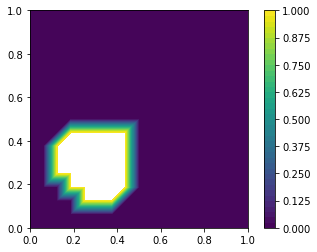

In [37]:
# Define initial value
ic= Expression("((pow(x[0]-0.3,2)+pow(x[1]-0.3,2))<0.2*0.2)?(1.0):(0.0)",degree=2, domain=mesh)
#u_0 = Expression(('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))+exp(-a*pow(x[0]-1.0, 2) - a*pow(x[1]-1.0, 2))'),
#                 degree=2, a=5)
u_n = interpolate(ic, Vh)
b = Expression(("-(x[1]-0.5)","(x[0]-0.5)"),degree=2, domain=mesh)
n = FacetNormal(mesh)
h = CellSize(mesh)
alpha = Constant(50.0)
# Define variational problem
u = TrialFunction(Vh)
v = TestFunction(Vh)
plt.colorbar(plot(u_n))
plt.show()

In [38]:
def advection(u, v, b, n):
    # Define |b * n|
    bn = abs(dot(b('+'), n('+')))
    # Contributions from cells
    a_cell = -dot(b*u, grad(v))*dx
    # Contribution from interior facets
    a_int = (dot(b('+'), jump(v,n))*avg(u) + 0.5*bn*dot(jump(u, n), jump(v, n)))*dS
    return a_cell + a_int

def diffusion(u, v, alpha, n, h):
    # Contribution from the cells
    a_cell = dot(grad(u), grad(v))*dx
    # Contribution from the interior facets
    a_int = (alpha('+')/h('+')* dot(jump(u, n), jump(v, n))- dot(avg(grad(v)), jump(u,n))- dot(jump(v, n), avg(grad(u))))*dS
    return a_cell + a_int

a =  u*v*dx + dt*(advection(u, v, b, n)+diffusion(u, v, alpha, n, h))
L = u_n*v*dx
# Create VTK file for saving solution
vtkfile = File('heat_gaussian_advect/solution.pvd')

In [39]:
# Time-stepping
u = Function(Vh)
t = 0
# Define boundary condition
u_D = Constant(0.0)

bc=DirichletBC(Vh,Constant(0.0),DomainBoundary(), method="geometric")

iteration: 0


/home/mrkeithypatarroyo/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'scalarbar'
  s)


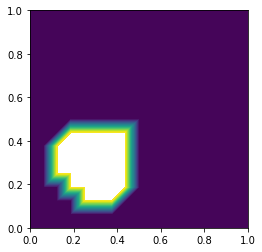

iteration:  0.0025
Calling FFC just-in-time (JIT) compiler, this may take some time.


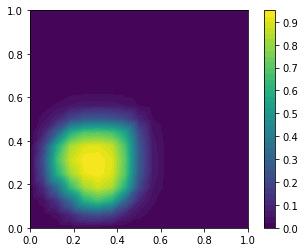

iteration:  0.005


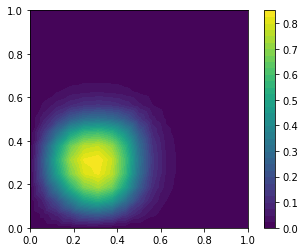

iteration:  0.0075


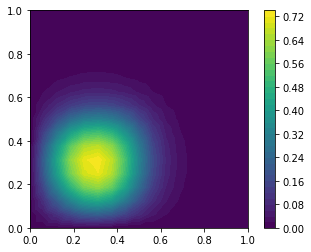

iteration:  0.01


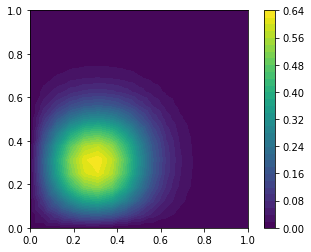

iteration:  0.0125


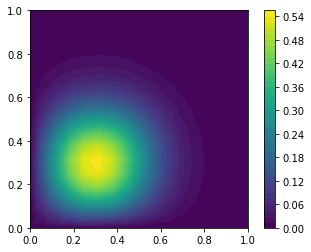

iteration:  0.015000000000000001


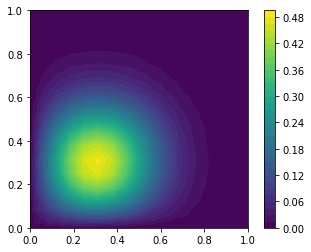

iteration:  0.0175


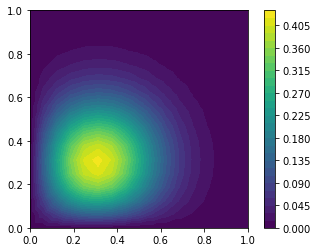

iteration:  0.02


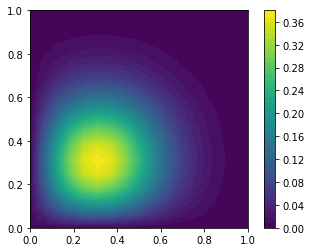

iteration:  0.0225


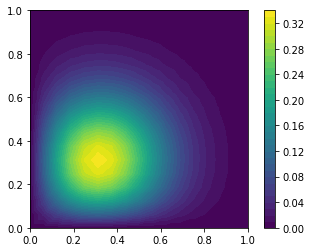

iteration:  0.024999999999999998


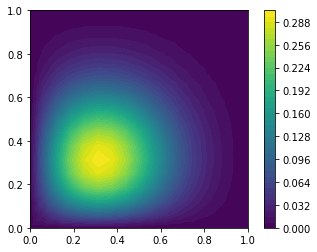

iteration:  0.027499999999999997


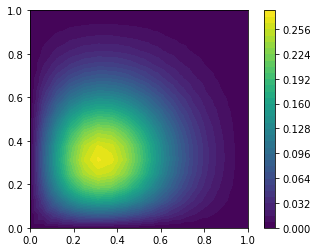

iteration:  0.029999999999999995


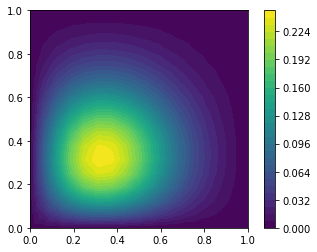

iteration:  0.032499999999999994


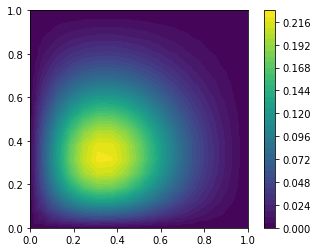

iteration:  0.034999999999999996


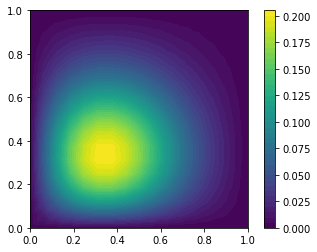

iteration:  0.0375


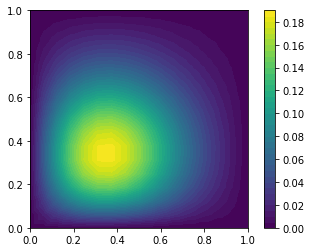

iteration:  0.04


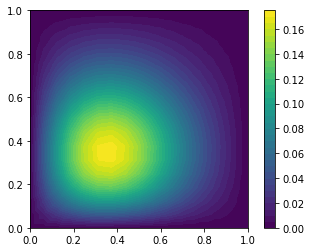

iteration:  0.0425


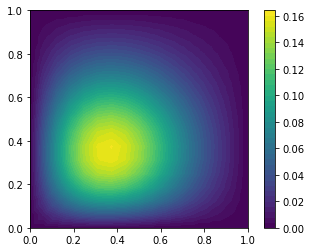

iteration:  0.045000000000000005


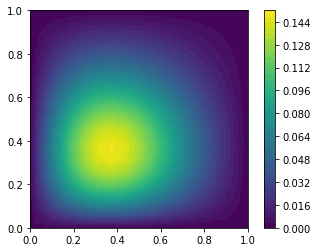

iteration:  0.04750000000000001


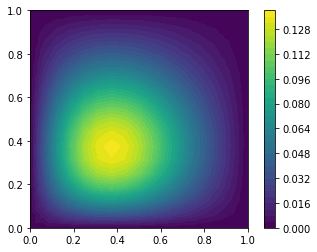

iteration:  0.05000000000000001


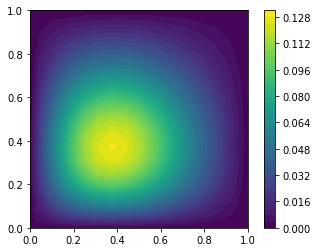

iteration:  0.05250000000000001


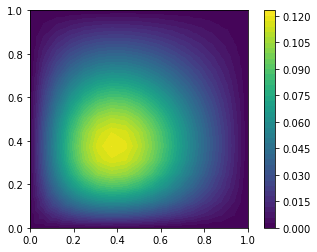

iteration:  0.055000000000000014


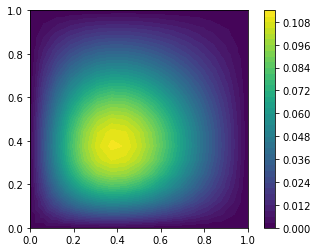

iteration:  0.057500000000000016


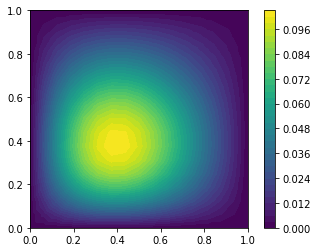

iteration:  0.06000000000000002


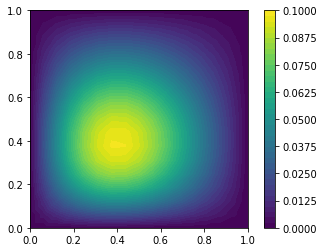

iteration:  0.06250000000000001


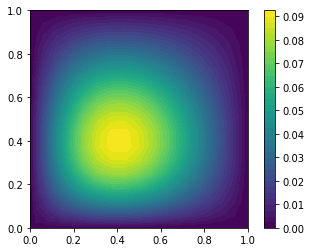

iteration:  0.06500000000000002


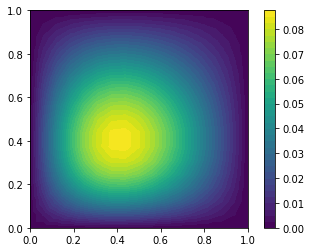

iteration:  0.06750000000000002


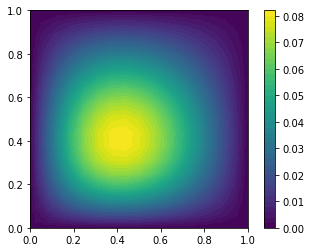

iteration:  0.07000000000000002


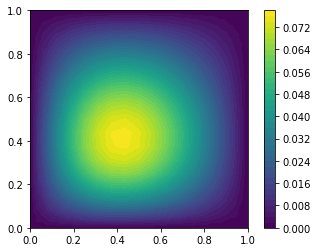

iteration:  0.07250000000000002


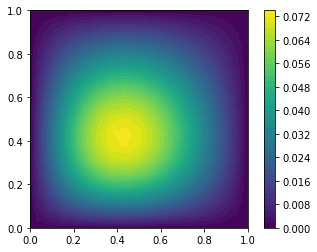

iteration:  0.07500000000000002


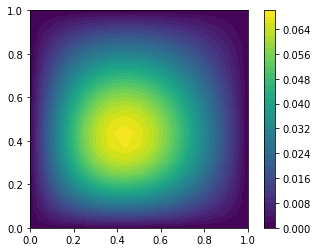

iteration:  0.07750000000000003


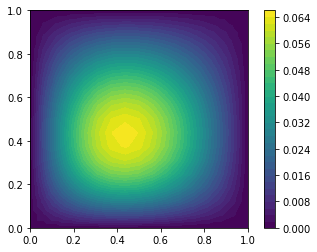

iteration:  0.08000000000000003


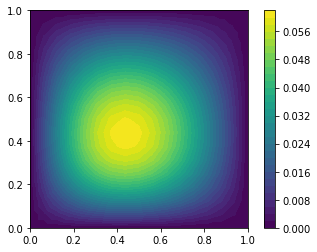

iteration:  0.08250000000000003


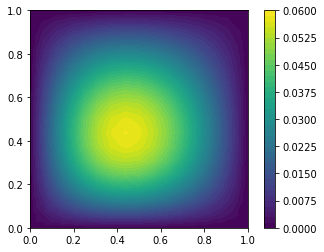

iteration:  0.08500000000000003


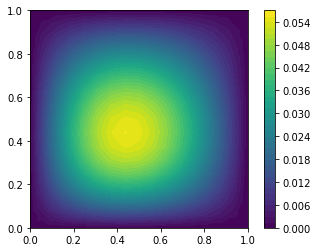

iteration:  0.08750000000000004


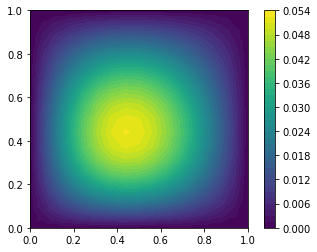

iteration:  0.09000000000000004


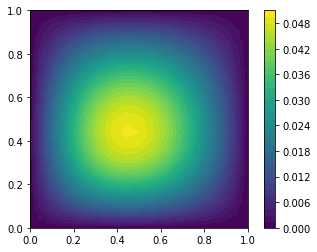

iteration:  0.09250000000000004


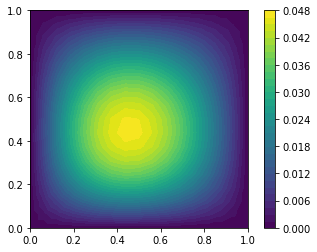

iteration:  0.09500000000000004


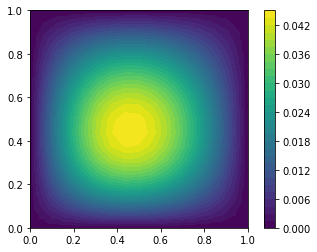

iteration:  0.09750000000000004


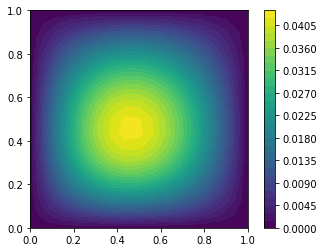

iteration:  0.10000000000000005


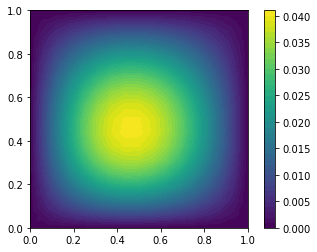

In [40]:
#Solution
print("iteration: 0")
plot(u_n,scalarbar = True)
plt.show()
time = [0.0]
for n in range(num_steps):

    # Update current time
    t += dt
    print("iteration: ",t)
    time.append(t)
    # Compute solution
    solve(a == L, u,bc)
    # Save to file and plot solution
    vtkfile << (u, t)
    plt.colorbar(plot(u))
    plt.show()
    # Update previous solution
    u_n.assign(u)